# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
from sklearn.metrics import r2_score



# IMPORTING DATASET

In [4]:
dataset=pd.read_csv('Health monitoring.csv')
dataset.head()

,SBP,DBP,Pulse,Temperature,Level
0,120,80,80,98,0
1,140,83,75,100,1
2,155,100,92,104,2
3,115,82,79,97,0
4,119,79,85,102,1


In [5]:
dataset.describe()

,SBP,DBP,Pulse,Temperature,Level
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,123.516779,81.261745,75.550336,99.926174,0.993289
std,14.486995,9.752613,5.344151,2.056939,0.850252
min,95.000000,60.000000,60.000000,94.000000,0.000000
25%,117.000000,77.000000,72.000000,98.000000,0.000000
50%,119.000000,80.000000,76.000000,100.000000,1.000000
75%,132.000000,88.000000,79.000000,101.000000,2.000000
max,155.000000,101.000000,92.000000,106.000000,2.000000


In [6]:
# Dataset dimensions - (rows, columns)
dataset.shape

(149, 5)

In [7]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
SBP            149 non-null int64
DBP            149 non-null int64
Pulse          149 non-null int64
Temperature    149 non-null int64
Level          149 non-null int64
dtypes: int64(5)
memory usage: 5.9 KB


In [8]:
# Count of null values
dataset.isnull().sum()

SBP            0
DBP            0
Pulse          0
Temperature    0
Level          0
dtype: int64

# DATA VISUALIZATION

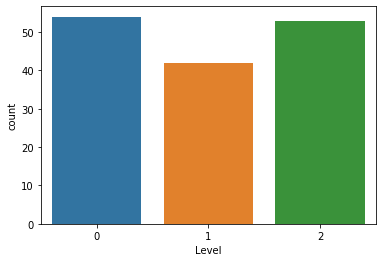

In [9]:
# Outcome countplot
sns.countplot(x = 'Level',data = dataset)

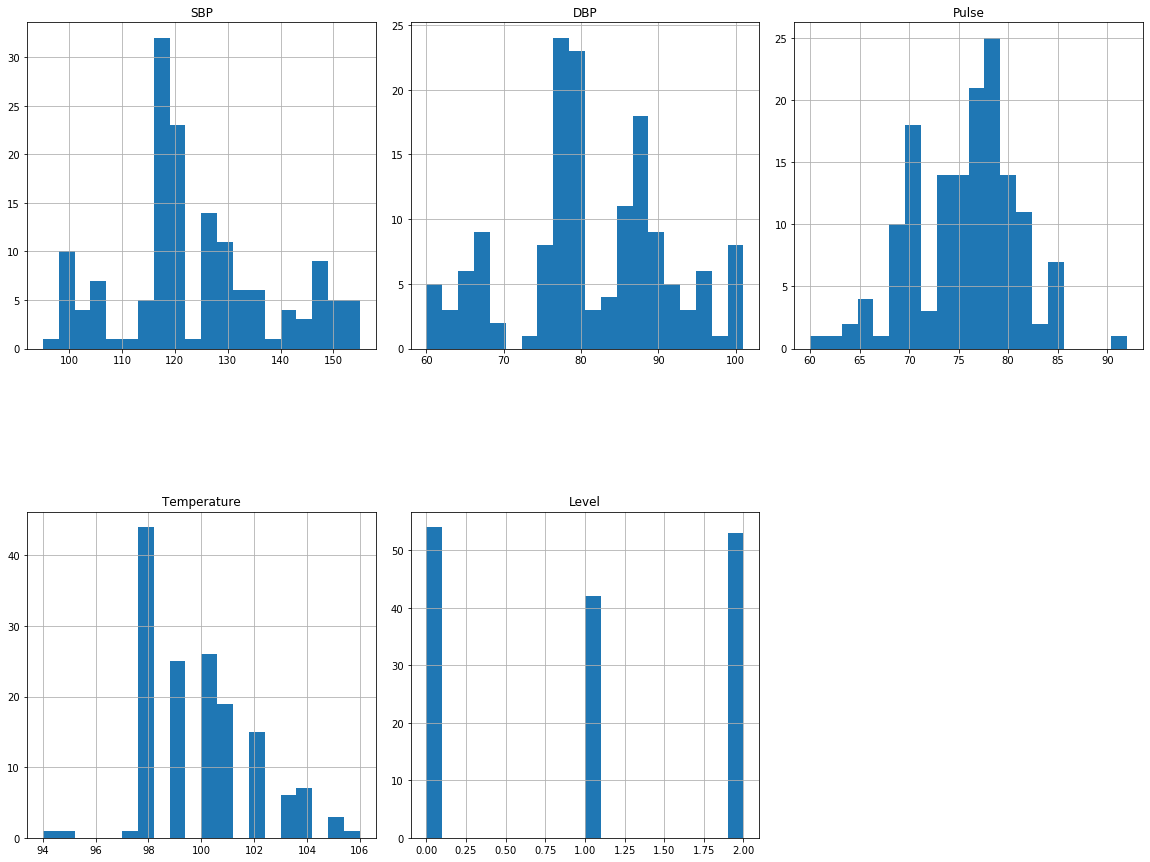

In [10]:
# Histogram of each feature
import itertools

col = dataset.columns[:5]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

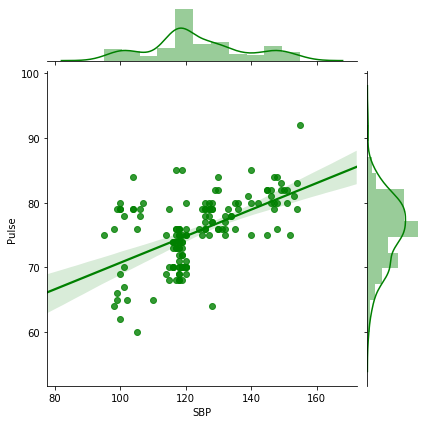

In [11]:
sns.jointplot(data=dataset, x='SBP', y='Pulse', kind='reg', color='g');

In [14]:
x=dataset.iloc[:,0:4].values
x[0:5]

array([[120,  80,  80,  98],
       [140,  83,  75, 100],
       [155, 100,  92, 104],
       [115,  82,  79,  97],
       [119,  79,  85, 102]])

In [15]:
y=dataset.iloc[:,4:].values
y[0:5]

array([[0],
       [1],
       [2],
       [0],
       [1]])

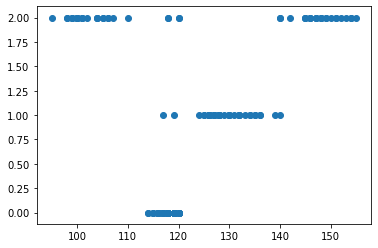

In [16]:
plt.scatter(x[:,0],y[:,0])

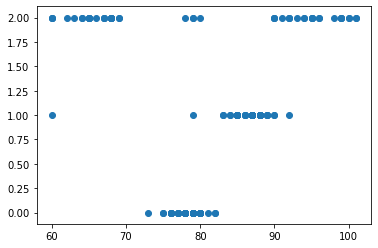

In [17]:
plt.scatter(x[:,1],y[:,0])

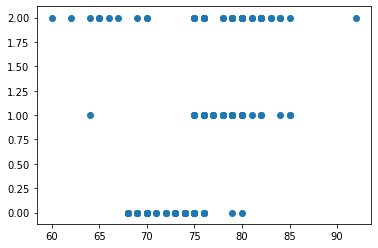

In [18]:
plt.scatter(x[:,2],y[:,0])

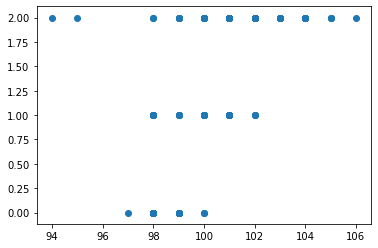

In [19]:
plt.scatter(x[:,3],y[:,0])

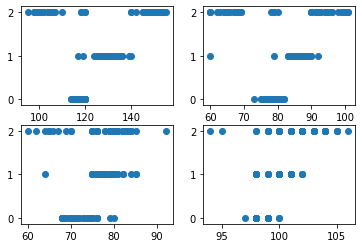

In [20]:
plt.subplot(2,2,1)
plt.scatter(x[:,0],y[:,0])
plt.subplot(2,2,2)
plt.scatter(x[:,1],y[:,0])
plt.subplot(2,2,3)
plt.scatter(x[:,2],y[:,0])
plt.subplot(2,2,4)
plt.scatter(x[:,3],y[:,0])


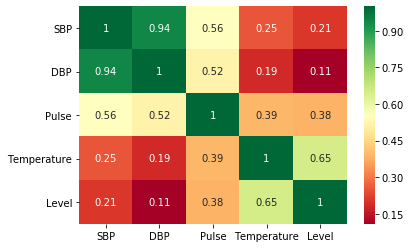

In [21]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True,cmap ='RdYlGn')
plt.show()

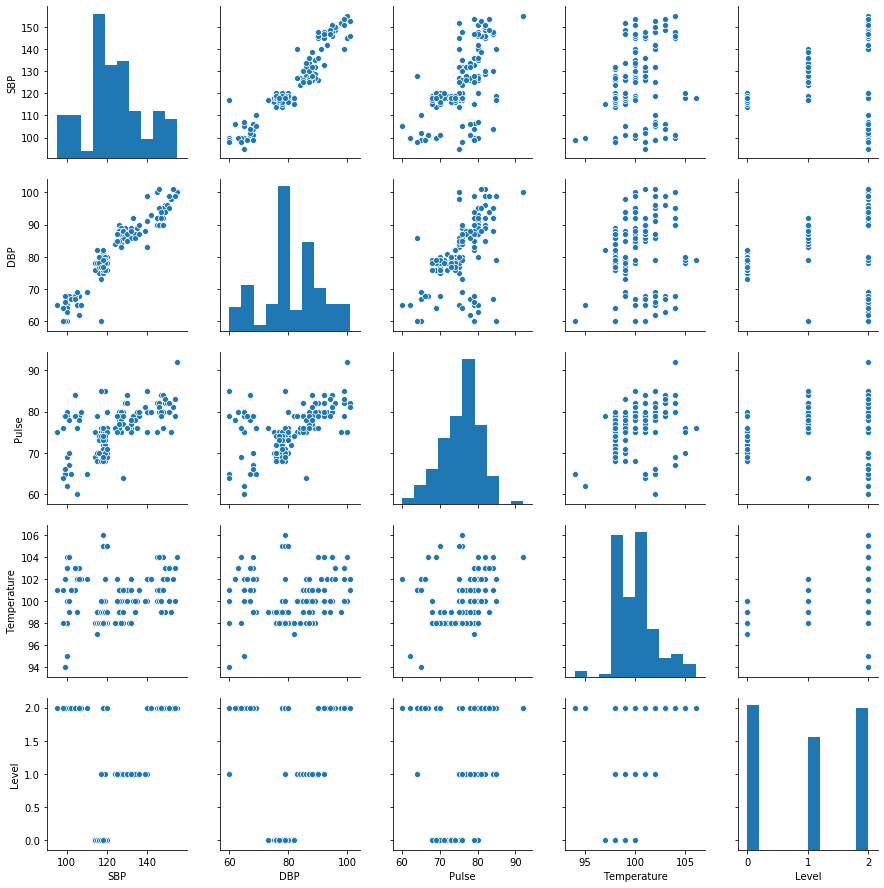

In [22]:
sns.pairplot(dataset)

# TAKING CARE OF MISSING DATA

In [23]:
dataset.isnull().any()

SBP            False
DBP            False
Pulse          False
Temperature    False
Level          False
dtype: bool

AS OUR DATASET CONTAINS ONLY NUMERICALS THERE IS NO NEED OF ANY ENCODING

# TRAIN TEST SPLITTING

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [25]:
x_train.shape

(119, 4)

In [26]:
y_train.shape

(119, 1)

In [27]:
x_test.shape

(30, 4)

In [28]:
y_test.shape

(30, 1)

# MODEL BUILDING

In [29]:
model= DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [30]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(x_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators =5 , criterion = 'entropy', random_state = 0)
ranfor.fit(x_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
y_pred_logreg = logreg.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_model = model.predict(x_test)
y_pred_ranfor = ranfor.predict(x_test)

In [39]:
import pickle
pickle.dump(model,open('project1.pkl','wb'))

In [40]:
y_pred=model.predict(x_test)
y_pred

array([2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2])

In [41]:
model.predict([[120,80,80,98]])

array([0])

In [42]:
y_test.flatten()

array([2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2])

# EVALUATING THE MODEL

In [45]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_model = accuracy_score(y_test, y_pred_model)
accuracy_ranfor = accuracy_score(y_test, y_pred_ranfor)

In [46]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_model * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 76.66666666666667
K Nearest neighbors: 90.0
Support Vector Classifier: 83.33333333333334
Naive Bayes: 96.66666666666667
Decision tree: 96.66666666666667
Random Forest: 100.0


In [43]:
model.score(x_test, y_test)

0.9666666666666667

In [47]:
accuracy_score(y_test, y_pred) 


0.9666666666666667

In [48]:
print("R2 score : %.2f" % r2_score(y_pred,y_test))

R2 score : 0.96


In [49]:
mean_squared_error(y_test, y_pred)

0.03333333333333333

In [50]:
precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.947


In [51]:
recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.947


In [52]:
score = f1_score(y_test, y_pred, average='micro')
print('F-Measure: %.3f' % score)

F-Measure: 0.967


In [53]:
results = confusion_matrix(y_test, y_pred) 
print(results) 

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]


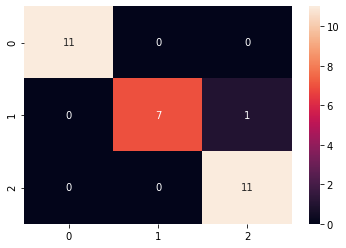

In [54]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(results), annot=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was 

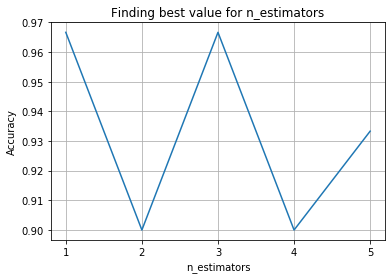

Highest value:  0.9666666666666667


In [55]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 6))
acc = pd.Series()
x = range(1,6)

for i in list(range(1, 6)):
    knn_model = RandomForestClassifier(n_estimators = i) 
    knn_model.fit(x_train, y_train)
    prediction = knn_model.predict(x_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())